<a href="https://colab.research.google.com/github/kgpark88/visionai/blob/main/object_detection_ssd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 객체 탐지 : SSD(Single-Shot Detector)
- 출처 : https://junha1125.github.io/blog/artificial-intelligence/2020-08-16-SSD2OpenCV/

### 파일 업로드
- 이미지 파일 : road.jpg

In [1]:
from google.colab import files
files.upload()

Saving road.jpg to road.jpg


{'road.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1G\xa3Exif\x00\x00II*\x00\x08\x00\x00\x00\x0b\x00\x0f\x01\x02\x00\x12\x00\x00\x00\x92\x00\x00\x00\x10\x01\x02\x00\x0b\x00\x00\x00\xa4\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\xb0\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\xb8\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x00\n\x00\x00\x00\xc0\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xca\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x14\x02\x05\x00\x06\x00\x00\x00\xde\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\x0e\x01\x00\x00%\x88\x04\x00\x01\x00\x00\x00z\x03\x00\x00\x8c\x03\x00\x00NIKON CORPORATION\x00NIKON D750\x00\xa4,\x01\x00\x00\x01\x00\x00\x00,\x01\x00\x00\x01\x00\x00\x00Ver.1.13 \x002020:10:28 13:54:50\x00\x00\x00\x00\x00\x01\x00\x00\x00\xff\x00\x00\x00\x01\x00\x00\x00\x80\x00\x00\x00\x01\x00\x00\x00\xff\x00\x00\x00\x01\x00\x00\x00\x80\x00\x00\x00\x01\x00\x00\x00\xff\x00\x00\x00\x01\x00\x00\x00%\x00\x9a\x82\x05\

### 라이브러리 업로드

In [3]:
import cv2
import matplotlib.pyplot as plt

image shape: (400, 600, 3)


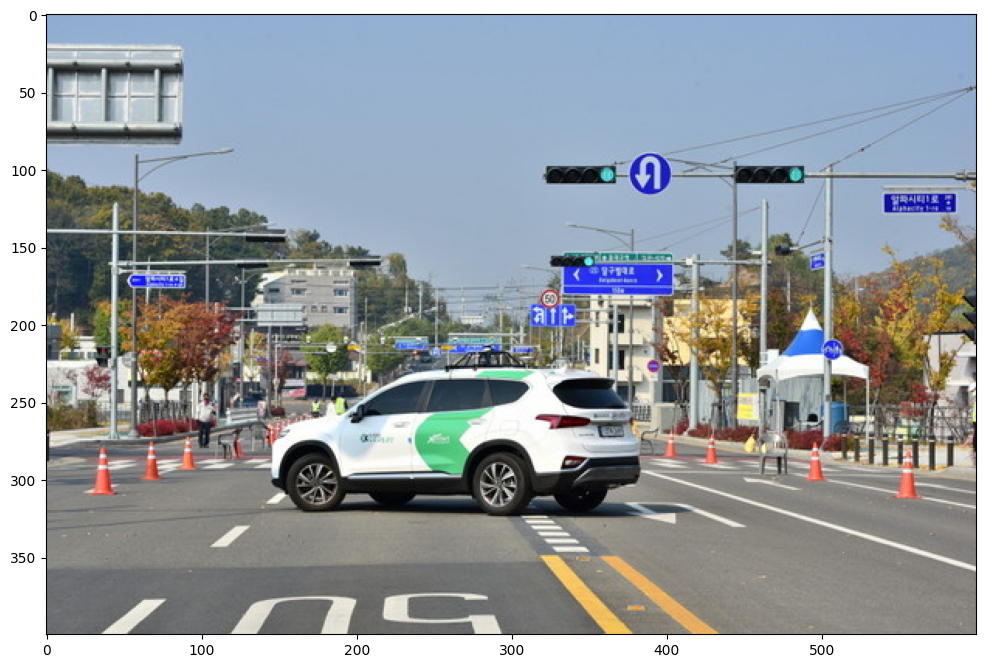

In [4]:
image_file = 'road.jpg'
img = cv2.imread(image_file)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img.shape)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

### Tensorflow에서 Pretrained Model과 환경파일을 다운로드 받은 후 이를 이용해 OpenCV에서 Inference 모델 생성
- 다운로드 URL : https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
- pretrained 모델 : http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz 다운로드 후 압축 해제  
- pretrained 모델 환경 파일 :  https://github.com/opencv/opencv_extra/blob/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt 다운로드

In [5]:
!mkdir pretrained
%cd ./pretrained
!wget http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt
!tar -xvf ssd*.tar.gz
!mv ssd_inception_v2_coco_2017_11_17.pbtxt graph.pbtxt
%cd ../

/content/pretrained
--2023-10-26 06:33:00--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.26.207, 172.217.193.207, 172.217.204.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.26.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278126337 (265M) [application/x-tar]
Saving to: ‘ssd_inception_v2_coco_2017_11_17.tar.gz’

ssd_inception_v2_co 100%[===================>] 265.24M   103MB/s    in 2.6s    

2023-10-26 06:33:02 (103 MB/s) - ‘ssd_inception_v2_coco_2017_11_17.tar.gz’ saved [278126337/278126337]

--2023-10-26 06:33:02--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserco

In [7]:
!ls -lt pretrained/ssd_inception_v2_coco_2017_11_17

total 201112
-rw-r----- 1 275875 5000 101987441 Nov 18  2017 frozen_inference_graph.pb
drwxr-x--- 3 275875 5000      4096 Nov 18  2017 saved_model
-rw-r----- 1 275875 5000   3701354 Nov 18  2017 model.ckpt.meta
-rw-r----- 1 275875 5000        77 Nov 18  2017 checkpoint
-rw-r----- 1 275875 5000 100214372 Nov 18  2017 model.ckpt.data-00000-of-00001
-rw-r----- 1 275875 5000     18073 Nov 18  2017 model.ckpt.index


In [8]:
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb',
                                     './pretrained/graph.pbtxt')

### coco 데이터 세트의 클래스id별 클래스명 지정.


In [9]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [12]:
labels_to_names[81]

'sink'

### Object Detection

(1, 1, 100, 7)
car: 0.9884 3
car: 0.3665 3
car: 0.3345 3
car: 0.3324 3
traffic light: 0.3072 10


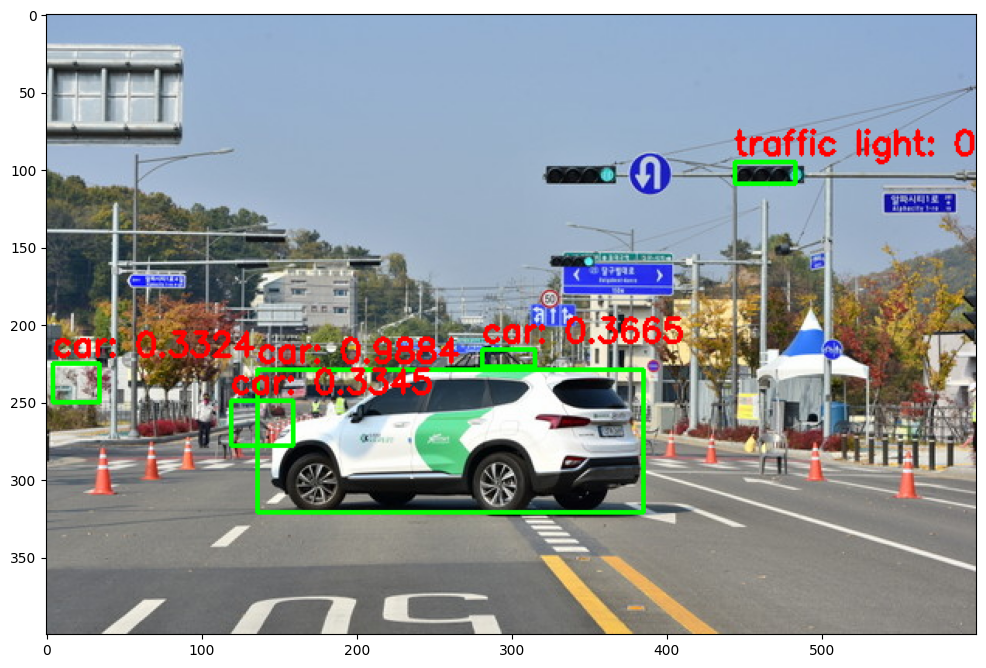

In [13]:
# 원본 이미지를 네트웍에 입력시에는 (300, 300)로 resize 함.
# 이후 결과가 출력되면 resize된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
rows = img.shape[0]
cols = img.shape[1]
# cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성.
draw_img = img.copy()

# 원본 이미지 배열을 사이즈 (300, 300)으로, BGR을 RGB로 변환하여 배열 입력
cv_net.setInput(cv2.dnn.blobFromImage(img,  size=(300, 300), swapRB=True, crop=False))

# Object Detection 수행하여 결과를 cv_out으로 반환
cv_out = cv_net.forward()
print(cv_out.shape)

# bounding box의 테두리와 caption 글자색 지정
green_color=(0, 255, 0)
red_color=(0, 0, 255)

# detected 된 object들을 iteration 하면서 정보 추출
for detection in cv_out[0,0,:,:]:
    score = float(detection[2])
    class_id = int(detection[1])
    # detected된 object들의 score가 0.3 이상만 추출
    if score > 0.3:
        # detected된 object들은 image 크기가 (300, 300)으로 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
        caption = "{}: {:.4f}".format(labels_to_names[class_id], score)

        #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
        cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)
        print(caption, class_id)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

### 위의 내용을 함수로 작성

In [15]:
import time

def get_detected_img(cv_net, img_array, score_threshold, use_copied_array=True, is_print=True):
    rows = img_array.shape[0]
    cols = img_array.shape[1]

    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
        #draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
    else:
        draw_img = img_array

    cv_net.setInput(cv2.dnn.blobFromImage(img_array, size=(300, 300), swapRB=True, crop=False))

    start = time.time()
    cv_out = cv_net.forward()

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    # detected 된 object들을 iteration 하면서 정보 추출
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        # detected된 object들의 score가 0.4 이상만 추출
        if score > score_threshold:
            # detected된 object들은 image 크기가 (300, 300)으로 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
            caption = "{}: {:.4f}".format(labels_to_names[class_id], score)

            #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)
    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")

    return draw_img

Detection 수행시간: 0.36 초


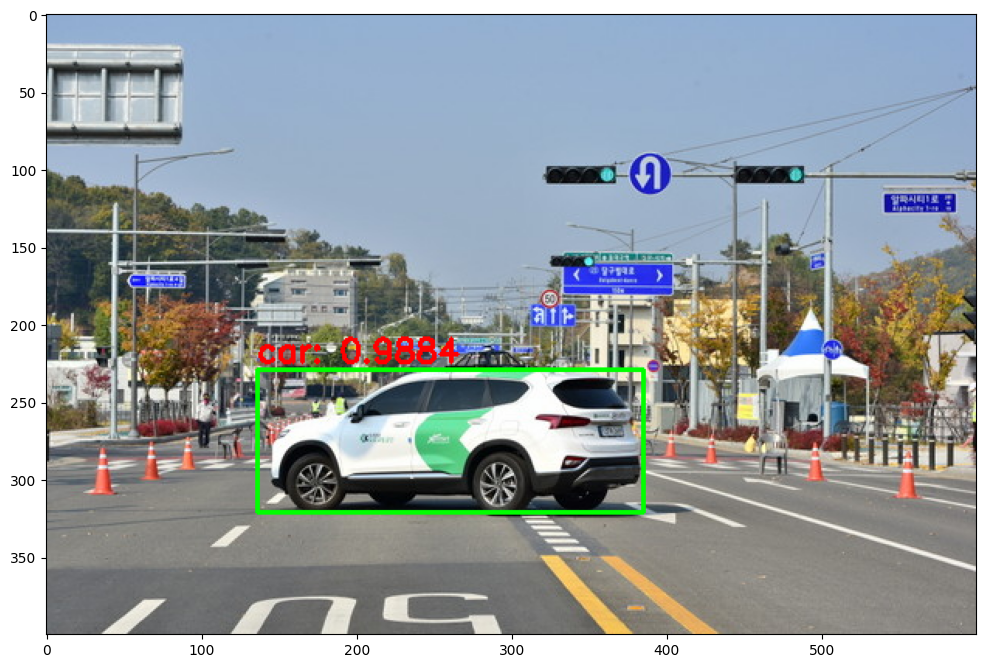

In [20]:
# get_detected_img() 함수를 이용해서 Detection 수행하기.
img = cv2.imread(image_file)

# tensorflow inference 모델 로딩
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb',
                                     './pretrained/graph.pbtxt')
# Object Detetion 수행 후 시각화
draw_img = get_detected_img(cv_net, img, score_threshold=0.7, use_copied_array=True, is_print=True)
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)